<a href="https://colab.research.google.com/github/NihaarikaJagadish/testRepo/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from sklearn.datasets import load_breast_cancer
from pandas import DataFrame,Series
import pandas as pd
#----- 0 - I am considering Malignant as 0 
#----- 1 - I am considering Benign as 1
data = load_breast_cancer()
#data
classes = data.target_names
print("The output classes are:", classes)
# print("The data description is as below")
# print(data.DESCR)

The output classes are: ['malignant' 'benign']


In [57]:
dataDF_X = DataFrame(data['data'],columns=data['feature_names']) #--- creating dataFrame with features
dataDF_Y = DataFrame(data['target'],columns=['target'])          #--- creating dataFrame with Labels
dataDF = dataDF_X.join(dataDF_Y)                                 #--- Merging the dataframes
print(len(dataDF_Y))
print(data['target'].shape)
dataDF.head()
#data = DataFrame(data)

569
(569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [58]:

#--- Checking for missing data
#dataDF.isnull().sum() #--- no column has null data
#dataDF.isna().sum()    #--- no column has NAN data in it

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataDF_X, dataDF_Y, test_size = 0.33, random_state = 0)

In [72]:
#---- Question 4 -- using custom logistic classifier
#%%time
from sklearn.datasets import load_breast_cancer
from pandas import DataFrame,Series
import pandas as pd

data = load_breast_cancer()
#data
classes = data.target_names
#--- Split the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataDF_X, dataDF_Y, test_size = 0.33, random_state = 1)
d = logisticFunction(X_train, Y_train, X_test, Y_test, 0.00001,  10000, True)

Cost after iteration number 0 : 0.693147
Cost after iteration number 1000 : 0.254450
Cost after iteration number 2000 : 0.227522
Cost after iteration number 3000 : 0.216847
Cost after iteration number 4000 : 0.211264
Cost after iteration number 5000 : 0.207845
Cost after iteration number 6000 : 0.205505
Cost after iteration number 7000 : 0.203760
Cost after iteration number 8000 : 0.202371
Cost after iteration number 9000 : 0.201208
Training accuracy: 91.60104986876641%
Testing accuracy: 92.55319148936171%


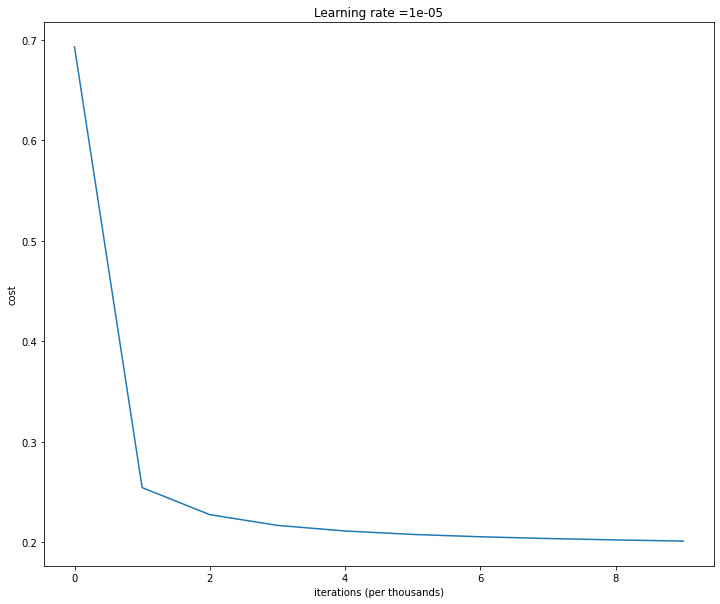

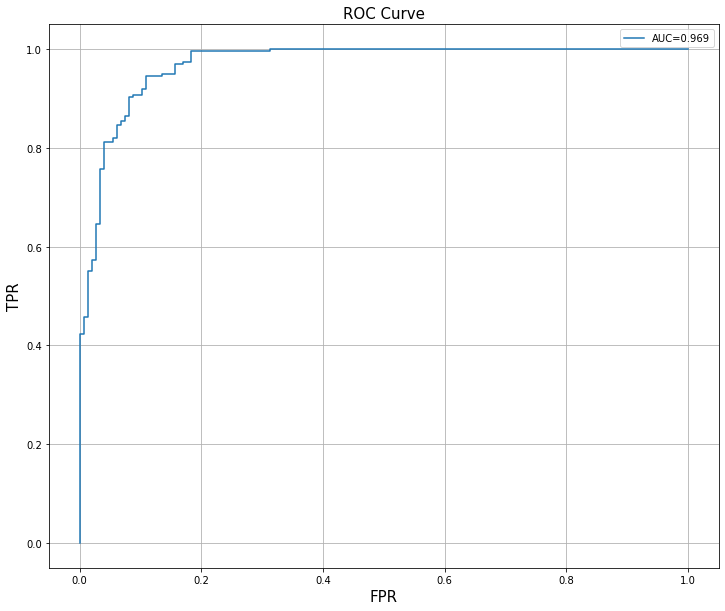

In [61]:
#--- ROC Curve - Custom build
probs = d['Y_prob_train']
y_preds = d['Y_Prediction_Train']
y_original = np.squeeze(Y_train)
plotROC(y_original,y_preds,probs)

--> fpr :  [0.         0.         0.         0.00680272 0.00680272 0.01360544
 0.01360544 0.02040816 0.02040816 0.02721088 0.02721088 0.03401361
 0.03401361 0.04081633 0.04081633 0.05442177 0.05442177 0.06122449
 0.06122449 0.06802721 0.06802721 0.07482993 0.07482993 0.08163265
 0.08163265 0.08843537 0.08843537 0.10204082 0.10204082 0.10884354
 0.10884354 0.13605442 0.13605442 0.15646259 0.15646259 0.17006803
 0.17006803 0.18367347 0.18367347 0.31292517 0.31292517 1.        ]
--> tpr :  [0.         0.0042735  0.42307692 0.42307692 0.45726496 0.45726496
 0.55128205 0.55128205 0.57264957 0.57264957 0.64529915 0.64529915
 0.75641026 0.75641026 0.81196581 0.81196581 0.82051282 0.82051282
 0.84615385 0.84615385 0.85470085 0.85470085 0.86324786 0.86324786
 0.9017094  0.9017094  0.90598291 0.90598291 0.91880342 0.91880342
 0.94444444 0.94444444 0.94871795 0.94871795 0.97008547 0.97008547
 0.97435897 0.97435897 0.9957265  0.9957265  1.         1.        ]
AUC Score (ROC Curve for Logistic Regr

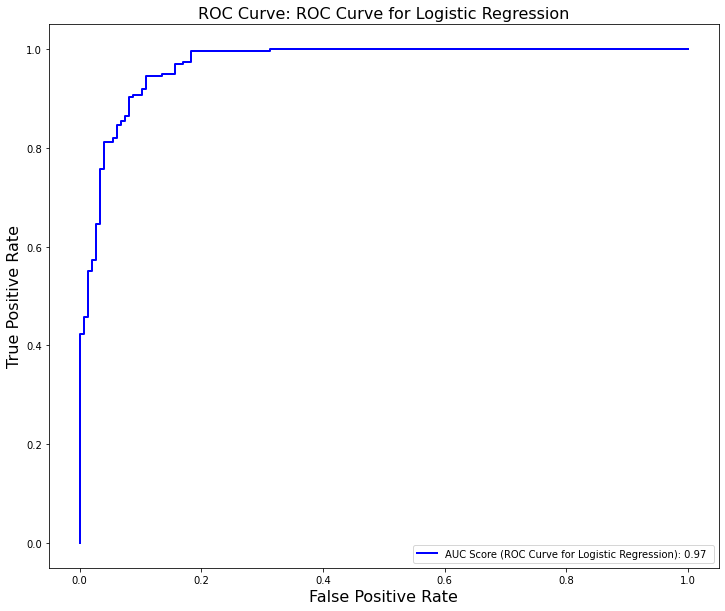

In [62]:
#--- Using Pre-defined function
title = 'ROC Curve for Logistic Regression'
label = 'None'
# calculate the ROC score
fpr, tpr, thresholds = roc_curve(y_original, probs)
#print('--> probs',np.squeeze(probs))
#print('--> thresholds : ',thresholds)
print('--> fpr : ',fpr)
print('--> tpr : ',tpr)
print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_original, probs)))    
label = 'AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_original, probs))
# plot the ROC curve
plt.figure(figsize=(12,10))
plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve: {}'.format(title), fontsize=16)
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 257.44, 'Predicted label')

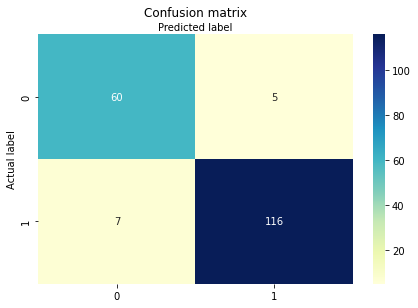

In [63]:
#--- Using Logistic Regression Algorithm to the Training Set Predefined model library
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)
#--- test the trained classifer
Y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
 #--- checking the accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
#---- plotting confusion matrix
class_names=classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
Y_proba = classifier.predict_proba(X_test)
#print('predicted probabilities',y_score[:])
cs_score = classifier.score(X_test, Y_test)
print('test accuracy -',cs_score)

test accuracy - 0.9361702127659575


AUC Score (ROC Curve for Logistic Regression): 0.98 


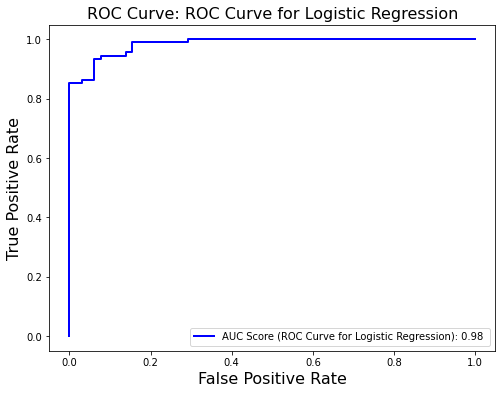

In [65]:
#---- ROC Curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve
from itertools import cycle
import matplotlib.pyplot as plt
%matplotlib inline

#--- 0 ---- Malignant - Harmful
#--- 1 ---- Benign - Not Harmful

# Compute ROC curve and ROC area for each class
title = 'ROC Curve for Logistic Regression'
label = 'None'
# calculate the ROC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_test, y_pred_proba)))    
label = 'AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_test, y_pred_proba))
# plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve: {}'.format(title), fontsize=16)
plt.legend(loc='lower right')
plt.show()